In [2]:
%matplotlib notebook
%reset -f


import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data = pd.read_csv('Movie_Data_Atualizado.csv')

In [4]:
data.head();

**Para rodar o lista_filmes e lista_atores tem que rodar o "codigo_nova_tabela"**

In [5]:
%store -r lista_atores
%store -r lista_filmes

In [6]:
lista_atores;
lista_filmes;

In [7]:
df = data[lista_atores]

In [8]:
df;

In [9]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [10]:
df.describe;

In [11]:
df2 = data.dropna();

In [12]:
Y = df2["Revenue (Millions)"]

In [13]:
len(sorted(df2.loc[:,lista_atores].sum(), reverse=True))

1985

In [14]:
df2.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Bijou Phillips,Roger Bart,Robert Hoffman,Briana Evigan,Cassie Ventura,Adam G. Sevani,Adam Pally,Thomas Middleditch,Shannon Woodward,Cheryl Hines
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,...,0,0,0,0,0,0,0,0,0,0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,...,0,0,0,0,0,0,0,0,0,0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,...,0,0,0,0,0,0,0,0,0,0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,...,0,0,0,0,0,0,0,0,0,0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df2.loc[:,lista_atores].sum()

Chris Pratt               6
Vin Diesel                7
Bradley Cooper           11
Zoe Saldana               6
Noomi Rapace              4
Logan Marshall-Green      2
Michael Fassbender       11
Charlize Theron           7
James McAvoy              7
Anya Taylor-Joy           3
Haley Lu Richardson       2
Jessica Sula              1
Matthew McConaughey       9
Reese Witherspoon         3
Seth MacFarlane           4
Scarlett Johansson       12
Will Smith                9
Jared Leto                2
Margot Robbie             3
Viola Davis               6
Matt Damon                8
Tian Jing                 1
Willem Dafoe              5
Andy Lau                  1
Ryan Gosling             10
Emma Stone               10
Rosemarie DeWitt          1
J.K. Simmons              5
Essie Davis               1
Andrea Riseborough        2
                         ..
Nicholas D'Agosto         1
Emma Bell                 1
Arlen Escarpeta           1
Morjana Alaoui            0
Mylène Jampanoï     

In [16]:
Y = df2["Revenue (Millions)"]

In [17]:
Y

0      333.13
1      126.46
2      138.12
3      270.32
4      325.02
5       45.13
6      151.06
8        8.01
9      100.01
10     234.02
11     169.27
12     532.17
13     248.75
14       2.87
15     368.31
16      67.12
17     162.16
18      51.69
19     100.50
20       7.22
21      47.70
23     153.69
24     103.14
28     113.08
29      54.65
30      60.31
31      10.64
32     155.33
33     363.02
34      26.84
        ...  
955     26.05
956     40.17
957     40.98
958     30.69
959     22.49
960      2.32
961      0.01
962     26.81
963      0.09
970     34.33
972     38.51
973     38.18
974      8.81
975     59.57
979      3.19
980     61.69
981     85.91
982     24.34
983     82.39
984     42.65
985     21.56
986     42.58
987     23.39
990     45.80
991      1.20
993     60.13
994     54.72
996     17.54
997     58.01
999     19.64
Name: Revenue (Millions), Length: 838, dtype: float64

In [18]:
X = df2[lista_atores]

In [19]:
nova_lista_atores = []
for ator in X.sum().index:
    print(ator, ":", X.sum()[ator])
    if X.sum()[ator] != 0:
        nova_lista_atores.append(ator)
X_limpo = df2[nova_lista_atores]

Chris Pratt : 6
Vin Diesel : 7
Bradley Cooper : 11
Zoe Saldana : 6
Noomi Rapace : 4
Logan Marshall-Green : 2
Michael Fassbender : 11
Charlize Theron : 7
James McAvoy : 7
Anya Taylor-Joy : 3
Haley Lu Richardson : 2
Jessica Sula : 1
Matthew McConaughey : 9
Reese Witherspoon : 3
Seth MacFarlane : 4
Scarlett Johansson : 12
Will Smith : 9
Jared Leto : 2
Margot Robbie : 3
Viola Davis : 6
Matt Damon : 8
Tian Jing : 1
Willem Dafoe : 5
Andy Lau : 1
Ryan Gosling : 10
Emma Stone : 10
Rosemarie DeWitt : 1
J.K. Simmons : 5
Essie Davis : 1
Andrea Riseborough : 2
Julian Barratt : 0
Kenneth Branagh : 1
Charlie Hunnam : 3
Robert Pattinson : 6
Sienna Miller : 5
Tom Holland : 2
Jennifer Lawrence : 10
Michael Sheen : 3
Laurence Fishburne : 2
Eddie Redmayne : 4
Katherine Waterston : 2
Alison Sudol : 1
Dan Fogler : 1
Taraji P. Henson : 2
Octavia Spencer : 2
Janelle Monáe : 1
Kevin Costner : 5
Felicity Jones : 5
Diego Luna : 3
Alan Tudyk : 1
Donnie Yen : 1
Auli'i Cravalho : 1
Dwayne Johnson : 10
Rachel House

In [20]:
regressao = regress(X_limpo, Y)

C:\Users\Erick.LAPTOP-MLIJ069K\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
regressao.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Revenue (Millions)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     1.511
Date:                Thu, 14 Nov 2019   Prob (F-statistic):              0.320
Time:                        09:36:35   Log-Likelihood:                -2843.9
No. Observations:                 838   AIC:                             7352.
Df Residuals:                       6   BIC:                         1.129e+04
Df Model:                         831                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         61.8097      5.639     10.962      0.000      48.012      75.607
Chris Pratt                  214.2145     51.836      4.133      0.006      87.377     341.052
Vin Diesel                  -109.5520     79.575     -1.377      0.218    -304.264      85.160
Bradley Cooper                32.1336     44.708      0.719      0.499     -77.263     141.531
Zoe Saldana                  134.5242     53.977      2.492      0.047       2.448     266.600
Noomi Rapace                 -75.6978     59.737     -1.267      0.252    -221.868      70.472
Logan Marshall-Green          86.2165     80.497      1.071      0.325    -110.752     283.185
Michael Fassbender            31.7351     39.637      0.801      0.454     -65.253     128.723
Charlize Theron               22.3965     46.916      0.477      0.650     -92.403     137.196
James McAvoy                  14.9639     47.227      0.317      0.762    -100.597     130.525
Anya Taylor-Joy              -12.2568     36.874     -0.332      0.751    -102.485      77.972
Haley Lu Richardson           22.7057     41.910      0.542      0.607     -79.844     125.256
Jessica Sula                  50.8975     48.378      1.052      0.333     -67.480     169.275
Matthew McConaughey          -17.2084     43.475     -0.396      0.706    -123.588      89.172
Reese Witherspoon             53.0846     79.276      0.670      0.528    -140.897     247.066
Seth MacFarlane              128.7066     64.373      1.999      0.093     -28.809     286.223
Scarlett Johansson            43.9274     42.741      1.028      0.344     -60.656     148.511
Will Smith                    78.6228     43.889      1.791      0.123     -28.771     186.016
Jared Leto                    51.5528     77.253      0.667      0.529    -137.479     240.585
Margot Robbie                 23.9668     71.620      0.335      0.749    -151.282     199.215
Viola Davis                  109.0678     59.314      1.839      0.116     -36.069     254.205
Matt Damon                    75.2881     42.894      1.755      0.130     -29.669     180.245
Tian Jing                    -50.5392     48.802     -1.036      0.340    -169.953      68.874
Willem Dafoe                   9.1106     52.599      0.173      0.868    -119.594     137.815
Andy Lau                     -50.5392     48.802     -1.036      0.340    -169.953      68.874
Ryan Gosling                 -33.0460     45.706     -0.723      0.497    -144.885      78.793
Emma Stone                    90.5344     47.594      1.902      0.106     -25.923     206.992
Rosemarie DeWitt              60.1101     91.120      0.660      0.534    -162.853     283.073
J.K. Simmons                 -28.3483     55.305     -0.513      0.627    -163.674     106.977
Essie Davis                  -15.2224     2

In [22]:
dir(regressao);

In [23]:
sorted_params = sorted(regressao.params, reverse=True)
sorted_params[0]

342.0659989824769

In [24]:
top_5 = []
i = 0
while i < 5:
    top_5.append(sorted_params[i])
    i+=1
print(top_5)


bottom_5 = []
i = 1
while i < 6:
    bottom_5.append(sorted_params[-i])
    i+=1
print(bottom_5)

[342.0659989824769, 342.06599898247686, 284.530848539854, 280.6970092848086, 279.41711564961344]
[-334.96084940692117, -205.81342628008258, -201.75246874822315, -195.59157769239542, -190.704914267872]


In [25]:
name_top_5 = []

for i in regressao.params.index:
    if regressao.params[i] in top_5:
        name_top_5.append(i)
        
name_bottom_5 = []

for i in regressao.params.index:
    if regressao.params[i] in bottom_5:
        name_bottom_5.append(i)

In [26]:
for i in name_top_5:
    print(i, ":", regressao.params[i])
    
print("-----")
    
for i in name_bottom_5:
    print(i, ":", regressao.params[i])

Sam Worthington : 280.6970092848086
Daisy Ridley : 342.0659989824769
John Boyega : 342.06599898247686
Heath Ledger : 279.41711564961344
Ty Simpkins : 284.530848539854
-----
Jeff Kahn : -195.59157769239542
Jon Favreau : -205.81342628008258
Lin Shaye : -190.704914267872
Joan Allen : -201.75246874822315
Oliver Platt : -334.96084940692117


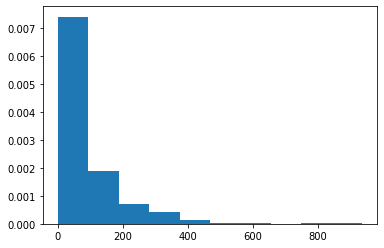

In [27]:
%matplotlib inline
plt.hist(Y, density=True);

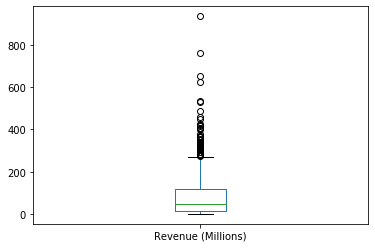

In [28]:
Y.plot.box();

In [29]:
for i in name_top_5:
    print(i, ":", df2[i].sum())

Sam Worthington : 6
Daisy Ridley : 1
John Boyega : 1
Heath Ledger : 2
Ty Simpkins : 2


In [30]:
for i in name_bottom_5:
    print(i, ":", df2[i].sum())

Jeff Kahn : 1
Jon Favreau : 3
Lin Shaye : 1
Joan Allen : 2
Oliver Platt : 1


In [31]:
revenue_top_5 = {}

for name in name_top_5:
    revenue_top_5[name] = 0

print(revenue_top_5)

for i in df2.index:
    for ator1 in name_top_5:
        if df2[ator1][i] == 1:
            revenue_top_5[ator1] += float(df2["Revenue (Millions)"][i])
            
print(revenue_top_5)

{'Sam Worthington': 0, 'Daisy Ridley': 0, 'John Boyega': 0, 'Heath Ledger': 0, 'Ty Simpkins': 0}
{'Sam Worthington': 1218.38, 'Daisy Ridley': 936.63, 'John Boyega': 936.63, 'Heath Ledger': 541.0100000000001, 'Ty Simpkins': 706.17}


In [32]:
revenue_bottom_5 = {}

for name in name_bottom_5:
    revenue_bottom_5[name] = 0

print(revenue_bottom_5)

for i in df2.index:
    for ator1 in name_bottom_5:
        if df2[ator1][i] == 1:
            revenue_bottom_5[ator1] += float(df2["Revenue (Millions)"][i])
            
print(revenue_bottom_5)

{'Jeff Kahn': 0, 'Jon Favreau': 0, 'Lin Shaye': 0, 'Joan Allen': 0, 'Oliver Platt': 0}
{'Jeff Kahn': 110.42, 'Jon Favreau': 259.1, 'Lin Shaye': 53.99, 'Joan Allen': 263.2, 'Oliver Platt': 32.36}


In [33]:
adjusted_revenue_top_5 = {}

for key in revenue_top_5:
    adjusted_revenue_top_5[key] = revenue_top_5[key]/df2[key].sum()

print(adjusted_revenue_top_5)

{'Sam Worthington': 203.06333333333336, 'Daisy Ridley': 936.63, 'John Boyega': 936.63, 'Heath Ledger': 270.50500000000005, 'Ty Simpkins': 353.085}


In [34]:
adjusted_revenue_bottom_5 = {}

for key in revenue_bottom_5:
    adjusted_revenue_bottom_5[key] = revenue_bottom_5[key]/df2[key].sum()

print(adjusted_revenue_bottom_5)

{'Jeff Kahn': 110.42, 'Jon Favreau': 86.36666666666667, 'Lin Shaye': 53.99, 'Joan Allen': 131.6, 'Oliver Platt': 32.36}


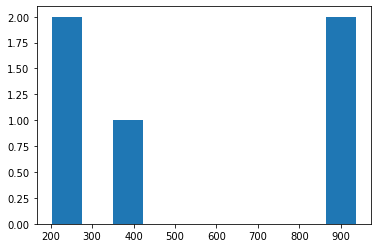

In [35]:
plt.hist(adjusted_revenue_top_5.values());

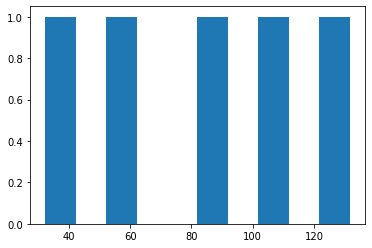

In [36]:
plt.hist(adjusted_revenue_bottom_5.values());

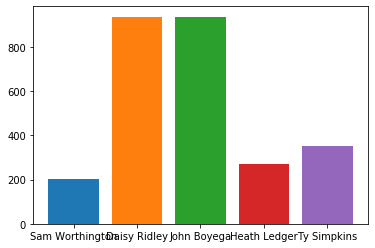

In [37]:
for ator,renda in adjusted_revenue_top_5.items():
    plt.bar(ator,renda)
plt.show()

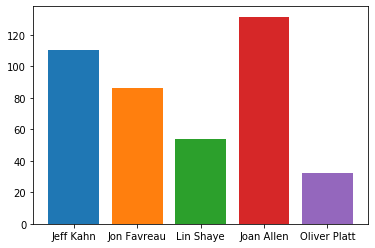

In [38]:
for ator,renda in adjusted_revenue_bottom_5.items():
    plt.bar(ator,renda)
plt.show()

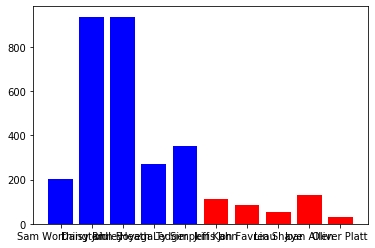

In [39]:
for ator,renda in adjusted_revenue_top_5.items():
    plt.bar(ator,renda, color="blue")
for ator,renda in adjusted_revenue_bottom_5.items():
    plt.bar(ator,renda, color="red")
plt.show()